In [ ]:
#data reading 
from google.colab import drive
drive.mount('/content/drive')

######## Q1
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15) # adjust fig size *for all figs*

######## Q2
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression, f_regression
import numpy as np

######## Q3
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

######## Q4
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV

######## Q5
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings

######## Q6
from sklearn.neural_network import MLPRegressor
import pickle

######## Q7
from sklearn.tree import export_graphviz
from sklearn.metrics import r2_score

######## Q8
!pip install scikit-optimize
import lightgbm as lgb
from skopt import BayesSearchCV

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
directory = '/content/drive/MyDrive/ECE 219/Project 4/diamond_data'

diamond = 'diamonds.csv'

diamond_file = os.path.join(directory, diamond)

df = pd.read_csv(diamond_file)

df = df.drop(columns = 'Unnamed: 0')

display(df)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,330,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,327,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,328,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,337,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,338,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2758,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2759,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2760,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# 3.1.2 Data Inspection

In [ ]:
cut_list = df['cut'].unique()

clarity_list = df['clarity'].unique()

color_list = df['color'].unique()

print(cut_list)
print(clarity_list)
print(color_list)

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
['E' 'I' 'J' 'H' 'F' 'G' 'D']


In [ ]:
# for cut and clarity, replaced with numbers 1-5 and 1-8.
cut_map = {'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1}

clarity_map = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2':6,  'VVS1': 7, 'IF':8}

color_map = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}

df['cut_numerical'] = df['cut'].map(cut_map)

df['clarity_numerical'] = df['clarity'].map(clarity_map)

df['color_numerical'] = df['color'].map(color_map)


display(df)

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_numerical,clarity_numerical,color_numerical
0,0.23,Ideal,E,SI2,61.5,55.0,330,3.95,3.98,2.43,5,2,6
1,0.21,Premium,E,SI1,59.8,61.0,327,3.89,3.84,2.31,4,3,6
2,0.23,Good,E,VS1,56.9,65.0,328,4.05,4.07,2.31,2,5,6
3,0.29,Premium,I,VS2,62.4,58.0,337,4.20,4.23,2.63,4,4,2
4,0.31,Good,J,SI2,63.3,58.0,338,4.34,4.35,2.75,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2758,5.75,5.76,3.50,5,3,7
53936,0.72,Good,D,SI1,63.1,55.0,2759,5.69,5.75,3.61,2,3,7
53937,0.70,Very Good,D,SI1,62.8,60.0,2760,5.66,5.68,3.56,3,3,7
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,4,2,3


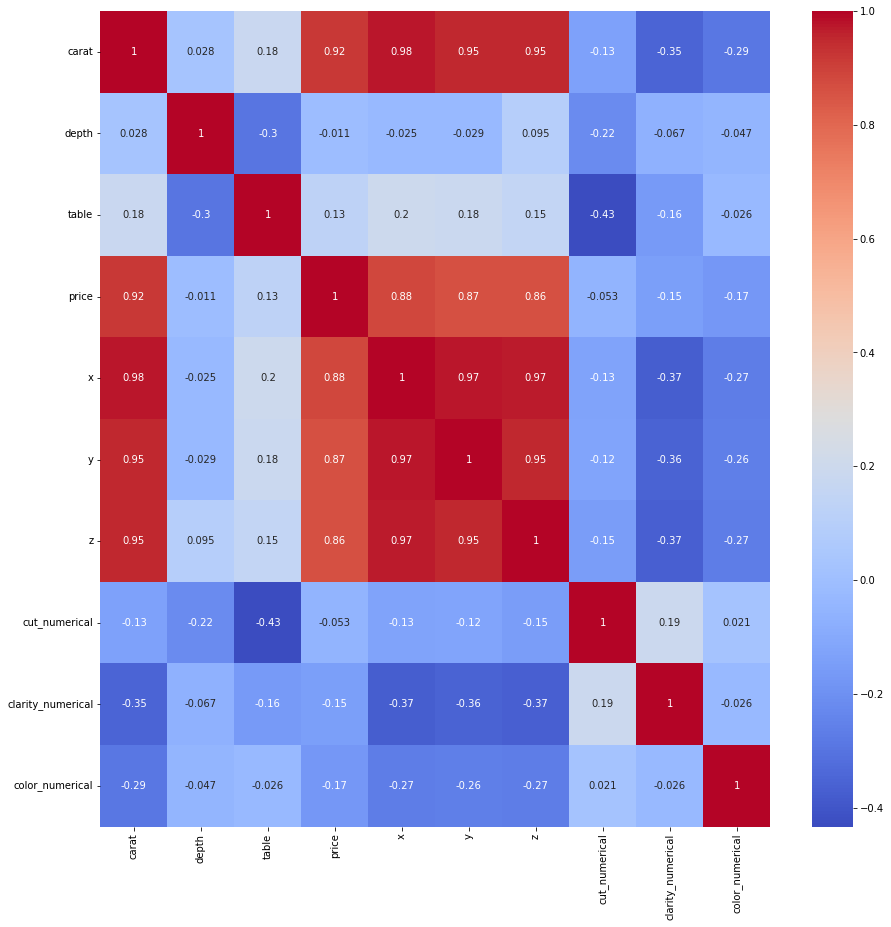

In [ ]:
corr_matrix = df.corr(method='pearson')

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

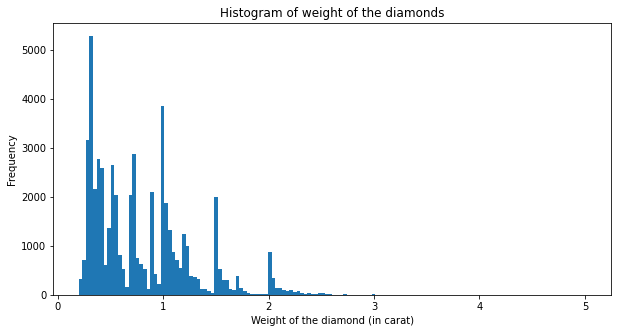

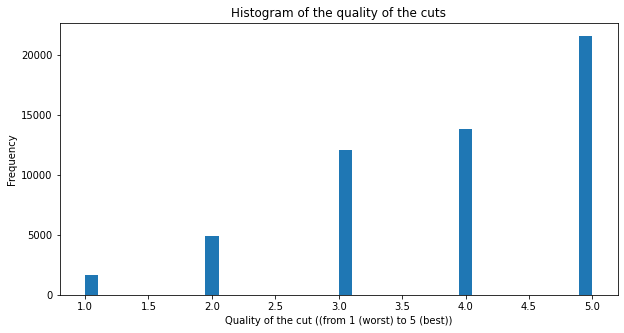

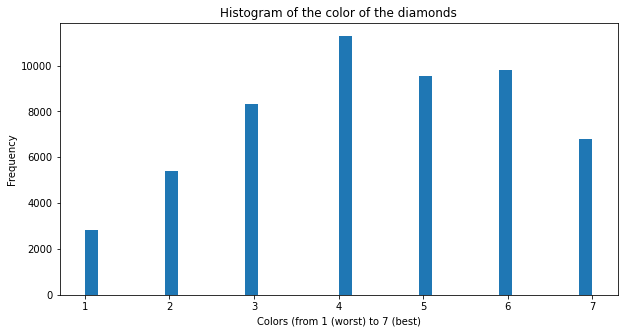

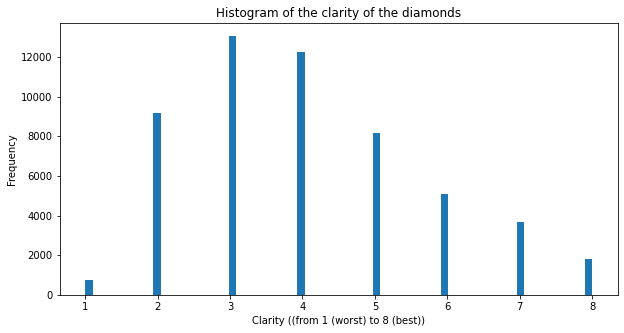

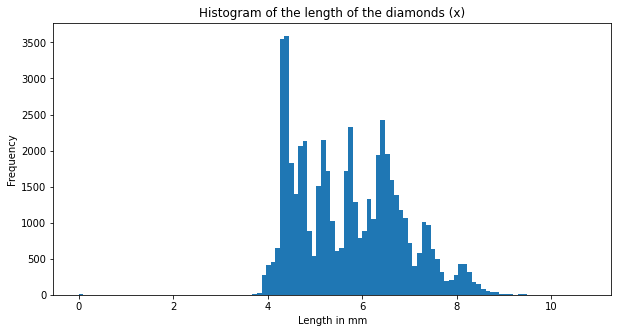

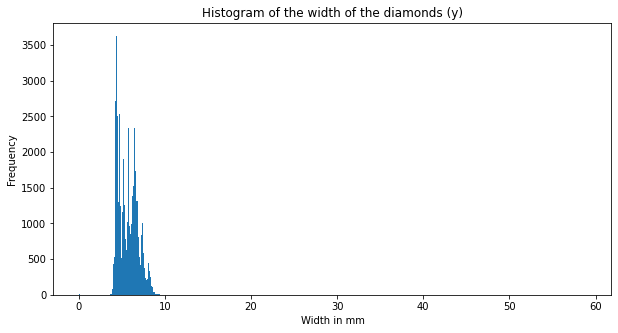

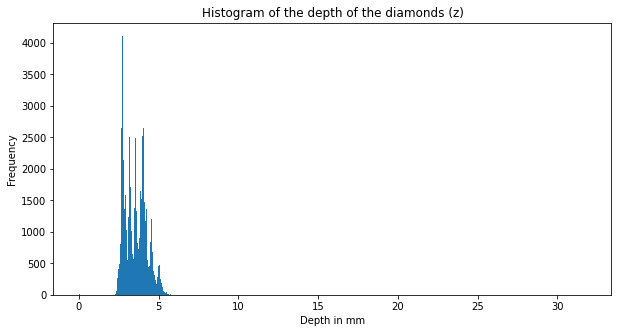

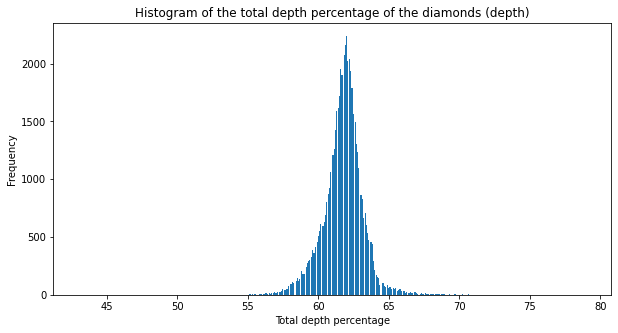

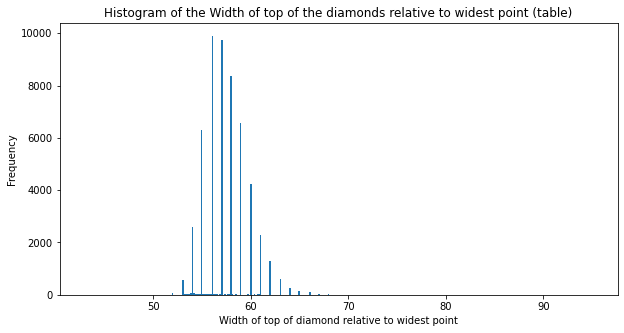

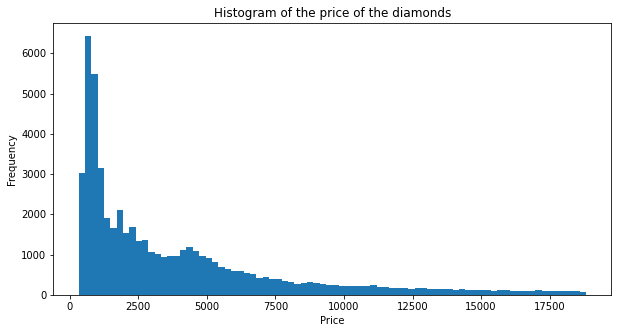

In [ ]:
df['carat'].hist(bins='auto', figsize=(10, 5))

plt.title('Histogram of weight of the diamonds')
plt.xlabel('Weight of the diamond (in carat)')
plt.ylabel('Frequency')

plt.grid(visible=False)
plt.show()

print('\n')


df['cut_numerical'].hist(bins='auto', figsize=(10, 5))

plt.title('Histogram of the quality of the cuts')
plt.xlabel('Quality of the cut ((from 1 (worst) to 5 (best))')
plt.ylabel('Frequency')

plt.grid(visible=False)
plt.show()

print('\n')

df['color_numerical'].hist(bins='auto', figsize=(10, 5))

plt.title('Histogram of the color of the diamonds')
plt.xlabel('Colors (from 1 (worst) to 7 (best)')
plt.ylabel('Frequency')

plt.grid(visible=False)
plt.show()

print('\n')

df['clarity_numerical'].hist(bins='auto', figsize=(10, 5))

plt.title('Histogram of the clarity of the diamonds')
plt.xlabel('Clarity ((from 1 (worst) to 8 (best))')
plt.ylabel('Frequency')

plt.grid(visible=False)
plt.show()

print('\n')


df['x'].hist(bins='auto', figsize=(10, 5))

plt.title('Histogram of the length of the diamonds (x)')
plt.xlabel('Length in mm')
plt.ylabel('Frequency')

plt.grid(visible=False)
plt.show()

print('\n')


df['y'].hist(bins='auto', figsize=(10, 5))

plt.title('Histogram of the width of the diamonds (y)')
plt.xlabel('Width in mm')
plt.ylabel('Frequency')

plt.grid(visible=False)
plt.show()

print('\n')


df['z'].hist(bins='auto', figsize=(10, 5))

plt.title('Histogram of the depth of the diamonds (z)')
plt.xlabel('Depth in mm')
plt.ylabel('Frequency')

plt.grid(visible=False)
plt.show()

print('\n')


df['depth'].hist(bins='auto', figsize=(10, 5))

plt.title('Histogram of the total depth percentage of the diamonds (depth)')
plt.xlabel('Total depth percentage')
plt.ylabel('Frequency')

plt.grid(visible=False)
plt.show()

print('\n')



df['table'].hist(bins='auto', figsize=(10, 5))

plt.title('Histogram of the Width of top of the diamonds relative to widest point (table)')
plt.xlabel('Width of top of diamond relative to widest point')
plt.ylabel('Frequency')

plt.grid(visible=False)
plt.show()

print('\n')

df['price'].hist(bins='auto', figsize=(10, 5))

plt.title('Histogram of the price of the diamonds')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.grid(visible=False)
plt.show()

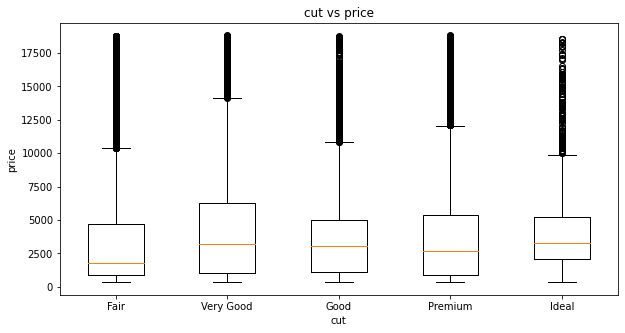

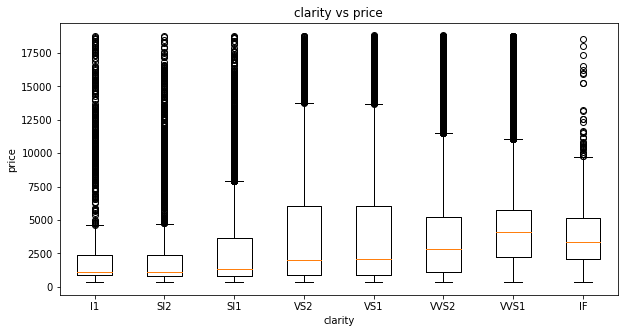

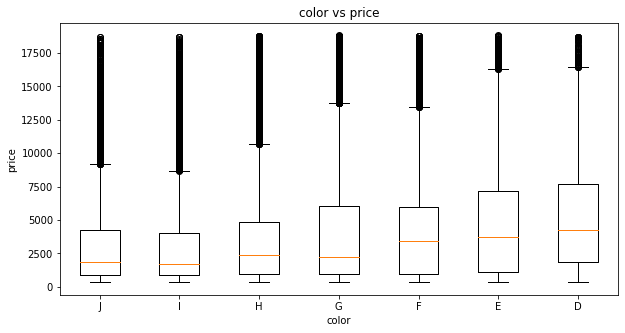

In [ ]:
def box_plot(category, target = 'price'):
  plt.rcParams["figure.figsize"] = (10,5)
  for i in category:
    if i == 'cut':
      plt.boxplot([df[df[i] == 'Ideal'][target],
                 df[df[i] == 'Premium'][target],
                 df[df[i] == 'Good'][target],
                 df[df[i] == 'Very Good'][target],
                 df[df[i] == 'Fair'][target]])
      plt.xticks([5,4,3,2,1], ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'])
      plt.title(i+ ' vs ' + target)
      plt.ylabel(target)
      plt.xlabel(i)
      plt.show()
      print('\n')
    elif i == 'clarity':
      plt.boxplot([df[df[i] == 'IF'][target],
                   df[df[i] == 'VVS1'][target],
                   df[df[i] == 'VVS2'][target],
                   df[df[i] == 'VS1'][target],
                   df[df[i] == 'VS2'][target],
                   df[df[i] == 'SI1'][target],
                   df[df[i] == 'SI2'][target],
                   df[df[i] == 'I1'][target]])
      plt.xticks([8,7,6,5,4,3,2,1], ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2','SI1','SI2', 'I1' ])
      plt.title(i+ ' vs ' + target)
      plt.ylabel(target)
      plt.xlabel(i)
      plt.show()
      print('\n')
    elif i == 'color':
      plt.boxplot([df[df[i] == 'D'][target],
                   df[df[i] == 'E'][target],
                   df[df[i] == 'F'][target],
                   df[df[i] == 'G'][target],
                   df[df[i] == 'H'][target],
                   df[df[i] == 'I'][target],
                   df[df[i] == 'J'][target]])
      
      plt.xticks([7,6,5,4,3,2,1], ['D', 'E', 'F', 'G', 'H','I','J'])
      plt.title(i+ ' vs ' + target)
      plt.ylabel(target)
      plt.xlabel(i)
      plt.show()
      print('\n')

box_plot(['cut','clarity','color'])

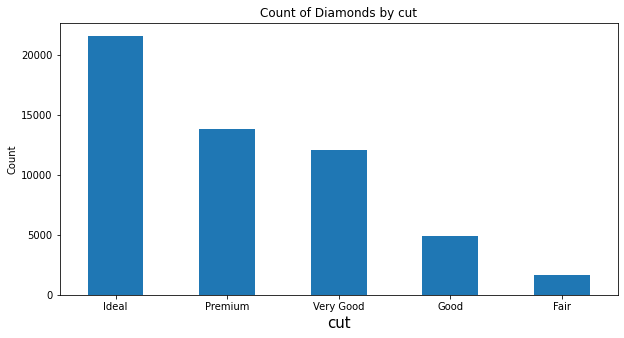

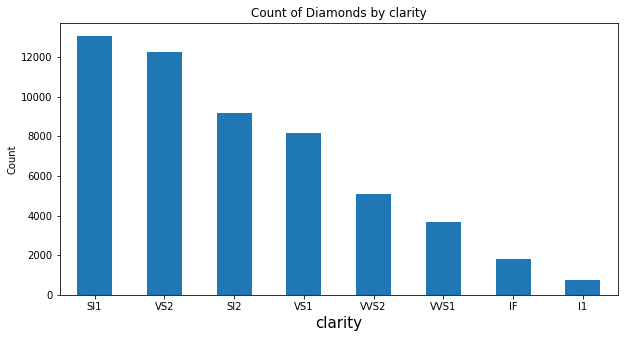

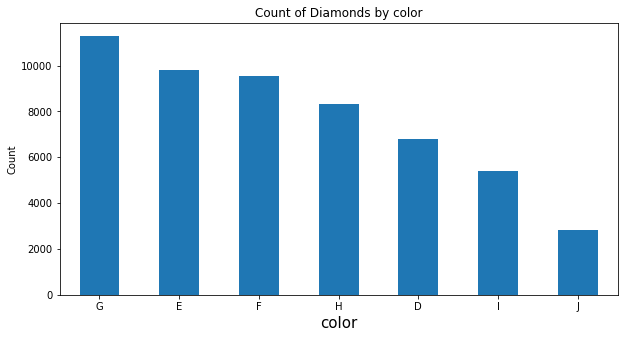

In [ ]:
def count_plot(category):
  for i in category:
    count = df[i].value_counts()
    count.plot(kind='bar',figsize= (10,5))
    plt.title('Count of Diamonds by ' + i)
    plt.xlabel(i, fontsize=15)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()
    print('\n')

count_plot(['cut','clarity','color'])

# 3.1.3 Standardization


In [ ]:
scaler = StandardScaler()

df_price = np.log(df['price'].values) # change to log scale

df_num = df.drop(columns = ['cut','clarity','color','price'])

df_num_value = df_num.values

df_standard = scaler.fit_transform(df_num_value)

display(df_price)
print('\n')
display(df_standard)


array([5.79909265, 5.78996017, 5.79301361, ..., 7.92298596, 7.92189841,
       7.92334821])

array([[-1.19816781, -0.17409151, -1.09967199, ...,  0.98147332,
        -1.24521508,  0.93716275],
       [-1.24036129, -1.36073849,  1.58552871, ...,  0.08588908,
        -0.63809506,  0.93716275],
       [-1.19816781, -3.38501862,  3.37566251, ..., -1.70527938,
         0.57614496,  0.93716275],
       ...,
       [-0.20662095,  0.73334442,  1.13799526, ..., -0.80969515,
        -0.63809506,  1.52502147],
       [ 0.13092691, -0.52310533,  0.24292836, ...,  0.08588908,
        -1.24521508, -0.8264134 ],
       [-0.10113725,  0.31452784, -1.09967199, ...,  0.98147332,
        -1.24521508,  1.52502147]])

# 3.1.4 Feature Selection


In [ ]:
mi = mutual_info_regression(df_standard, df_price)

In [ ]:
# find lowest 2 features 

lowest_2_mi = mi.argsort()[:2]

feature_indices = np.arange(df_standard.shape[1])

lowest_indices = feature_indices[lowest_2_mi]

feature_names = df_num.columns[lowest_indices]

print("Two features for diamond dataset that has the lowest MI w.r.t to the target are :", feature_names)

Two features for diamond dataset that has the lowest MI w.r.t to the target are : Index(['depth', 'table'], dtype='object')


In [ ]:
# find top 5 features 

highest_mi = mi.argsort()[::-1][:5]

highest_indices = feature_indices[highest_mi]

feature_names = df_num.columns[highest_indices]

print(feature_names)

Index(['carat', 'y', 'x', 'z', 'clarity_numerical'], dtype='object')


In [ ]:
# select top 5 features 
df_feature = df[['carat', 'y', 'x', 'z', 'clarity_numerical']] #,'color_numerical','cut_numerical']]

df_feature_value = df_feature.values

df_feature_standard = scaler.fit_transform(df_feature_value)

# 3.3 Evaluation


In [ ]:
def rmse_error(model, X, y, print_enable = True, return_enable = True, kf = KFold(n_splits=10)):

  train_rmse = []
  val_rmse = []

  for train_index, test_index in kf.split(X):
    
    X_train = X[train_index]

    X_test = X[test_index]

    y_train = y[train_index]

    y_test = y[test_index]

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    val_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

  train_avg_rmse = np.mean(train_rmse)
  val_avg_rmse = np.mean(val_rmse)

  if print_enable == True:
    print('Average RMSE for training set in ', model, ' is ', train_avg_rmse)
    print('Average RMSE for validation set in ', model, ' is ', val_avg_rmse)
    print('\n')
  if return_enable == True:
    return train_avg_rmse, val_avg_rmse

In [ ]:
"""
def avg_trian_val_rmse(train_rmse, val_rmse):
  avg_list = []

  for i in range(len(train_rmse)):
    avg_list.append((train_rmse[i] + val_rmse[i])/2)
    
  return avg_list
"""

def avg_trian_val_rmse(train_rmse, val_rmse):
    
  return val_rmse

# 3.3.1 Linear Regression

In [ ]:
#finding best regularization scheme along with the optimal penalty parameter 
#using loop and graph
def plot_reg_rmse(penalty_parameter, X, y, log_scale = False):
  train_rmse_r = []
  val_rmse_r = []
  train_rmse_l = []
  val_rmse_l = []
  for i in penalty_parameter:

    lasso_model = Lasso(alpha = i, max_iter=3000)
    ridge_model = Ridge(alpha = i, max_iter=3000)
  
    train_rmse_lasso, val_rmse_lasso = rmse_error(lasso_model, X=X, y=y, print_enable = False)

    train_rmse_l.append(train_rmse_lasso)
    val_rmse_l.append(val_rmse_lasso)

    train_rmse_ridge, val_rmse_ridge = rmse_error(ridge_model, X=X, y=y, print_enable = False)

    train_rmse_r.append(train_rmse_ridge)
    val_rmse_r.append(val_rmse_ridge)

  fig, (ax1, ax2) = plt.subplots(1,2,
                               figsize=(15, 6)
                              )
  ax1.plot(penalty_parameter, train_rmse_l, label= 'train set Rmse error')
  ax1.plot(penalty_parameter, val_rmse_l, label= 'validation set Rmse error')

  ax2.plot(penalty_parameter, train_rmse_r, label= 'train set Rmse error')
  ax2.plot(penalty_parameter, val_rmse_r, label= 'validation set Rmse error')

  ax1.set_ylabel('Error value', fontsize = 12)
  ax2.set_ylabel('Error value', fontsize = 12)


  ax1.set(title = "Lasso model")

  ax2.set(title = "Ridge model")

  ax1.set_xlabel('Penalty parameter', fontsize = 12)
  ax2.set_xlabel('Penalty parameter', fontsize = 12)

  if log_scale == True: 

    ax1.set_xscale('log') 
    ax2.set_xscale('log')
    ax1.set_xlabel('Penalty parameter (log scale)', fontsize = 12)
    ax2.set_xlabel('Penalty parameter (log scale)', fontsize = 12) 


  ax1.legend()
  ax2.legend()
  plt.show()

  avg_list_l = avg_trian_val_rmse(train_rmse_l, val_rmse_l)
  min_rmse_l = min(avg_list_l)
  min_pos_l = avg_list_l.index(min_rmse_l)

  print("\n")
  print("Minimum Rmse for Lasso model (based on validation) is :", min_rmse_l)
  print("Penalty parameter is :", penalty_parameter[min_pos_l])

  print("\n")

  avg_list_r = avg_trian_val_rmse(train_rmse_r, val_rmse_r)
  min_rmse_r = min(avg_list_r)
  min_pos_r = avg_list_r.index(min_rmse_r)

  print("Minimum Rmse for Ridge model (based on validation) is :", min_rmse_r)
  print("Penalty parameter is :", penalty_parameter[min_pos_r])
  print("\n")

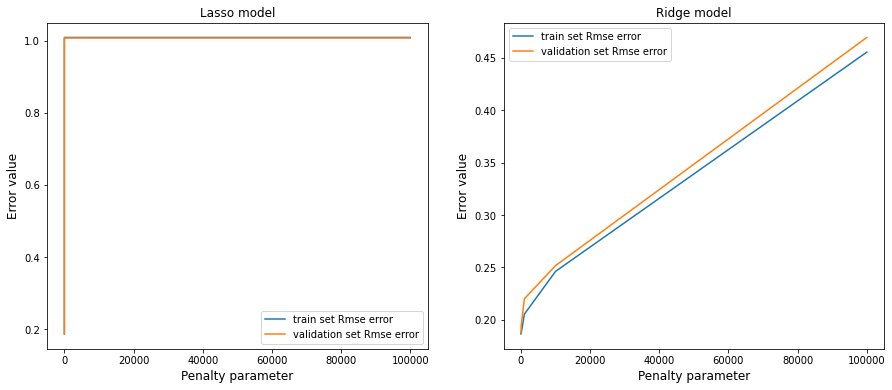



Minimum Rmse for Lasso model (based on validation) is : 0.18758784315747593
Penalty parameter is : 0.0001


Minimum Rmse for Ridge model (based on validation) is : 0.18760697861124945
Penalty parameter is : 1e-06




In [ ]:
penalty_parameter = [10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 100, 1000, 10000, 100000]

plot_reg_rmse(penalty_parameter, df_standard , df_price)

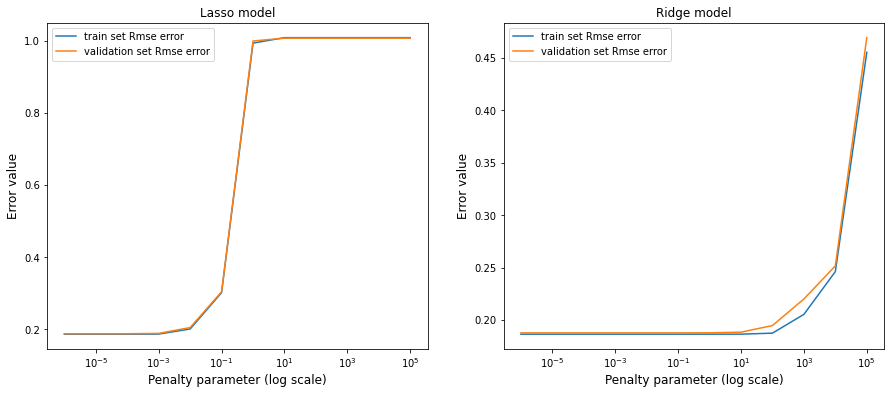



Minimum Rmse for Lasso model (based on validation) is : 0.18758784315747593
Penalty parameter is : 0.0001


Minimum Rmse for Ridge model (based on validation) is : 0.18760697861124945
Penalty parameter is : 1e-06




In [ ]:
penalty_parameter = [10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 100, 1000, 10000, 100000]

plot_reg_rmse(penalty_parameter, df_standard , df_price, log_scale = True)

In [ ]:
#finding best regularization scheme along with the optimal penalty parameter 
#using gridsearch

penalty_parameter = [10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 100, 1000, 10000, 100000]

X_train, X_test, y_train, y_test = train_test_split(df_standard, df_price, test_size=0.2)


lasso_params = {'alpha': penalty_parameter}

ridge_params = {'alpha': penalty_parameter}



lasso_grid = GridSearchCV(Lasso(max_iter=3000), lasso_params, cv=10, scoring='neg_root_mean_squared_error')

#lasso_grid.fit(df_standard, df_price)
lasso_grid.fit(X_train, y_train)

lasso_rmse= -lasso_grid.best_score_

print('Best Lasso RMSE:', lasso_rmse)
print('Best Lasso params:', lasso_grid.best_params_)


ridge_grid = GridSearchCV(Ridge(max_iter=3000), ridge_params, cv=10, scoring='neg_root_mean_squared_error')

#ridge_grid.fit(df_standard, df_price)
ridge_grid.fit(X_train, y_train)

ridge_rmse = -ridge_grid.best_score_

print('Best Ridge RMSE:', ridge_rmse )
print('Best Ridge parameter:', ridge_grid.best_params_)

Best Lasso RMSE: 0.18107954841657098
Best Lasso params: {'alpha': 1e-06}
Best Ridge RMSE: 0.18107966890417368
Best Ridge parameter: {'alpha': 1e-06}


In [ ]:
#compare 3 models
ols_model = LinearRegression()

lasso_model = Lasso(alpha = 0.0001) 

ridge_model = Ridge(alpha = 10**-6)

rmse_error(ols_model, df_standard, df_price, return_enable=False)

rmse_error(lasso_model, df_standard, df_price,return_enable=False)

rmse_error(ridge_model, df_standard, df_price, return_enable=False)

Average RMSE for training set in  LinearRegression()  is  0.18637135150134565
Average RMSE for validation set in  LinearRegression()  is  0.18760697854386735


Average RMSE for training set in  Lasso(alpha=0.0001)  is  0.18637376397656663
Average RMSE for validation set in  Lasso(alpha=0.0001)  is  0.18758784315747593


Average RMSE for training set in  Ridge(alpha=1e-06)  is  0.18637135150134562
Average RMSE for validation set in  Ridge(alpha=1e-06)  is  0.18760697861124945




In [ ]:
#compare standardization 

print('w/ standardization :')
rmse_error(ridge_model, df_standard, df_price, return_enable=False)

print('w/o standardization :')
rmse_error(ridge_model, df_num_value, df_price, return_enable=False)

w/ standardization :
Average RMSE for training set in  Ridge(alpha=1e-06)  is  0.18637135150134562
Average RMSE for validation set in  Ridge(alpha=1e-06)  is  0.18760697861124945


w/o standardization :
Average RMSE for training set in  Ridge(alpha=1e-06)  is  0.18637135150134565
Average RMSE for validation set in  Ridge(alpha=1e-06)  is  0.18760697859825154




# 3.3.2 Polynomial Regression


In [ ]:
#finding best ploy degree
#using loop and graph
def plot_ploy_rmse(deg_list):
  plt.rcParams["figure.figsize"] = (10,5)
  warnings.filterwarnings("ignore")
  train_rmse_p = []
  val_rmse_p = []

  for i in deg_list:
    pipeline_ploy = make_pipeline(
        PolynomialFeatures(degree = i),
        Ridge(alpha = 10**-6)
    )
  
    train_rmse, val_rmse = rmse_error(pipeline_ploy, df_feature_standard, df_price, print_enable = False)

    train_rmse_p.append(train_rmse)
    val_rmse_p.append(val_rmse)


  plt.plot(deg_list, train_rmse_p, label= 'train set Rmse error')
  plt.plot(deg_list, val_rmse_p, label= 'validation set Rmse error')



  plt.ylabel('Error value', fontsize = 12)


  plt.title("Polynomial regression model ") 


  plt.xlabel('Polynomial degrees', fontsize = 12)

  plt.legend()
  plt.show()

  avg_list_p = avg_trian_val_rmse(train_rmse_p, val_rmse_p)
  min_rmse_p = min(avg_list_p)
  min_pos_p = avg_list_p.index(min_rmse_p)

  print('\n')
  print("Minimum Rmse for Polynomial regression model (based on avergae train & validation) is :", min_rmse_p)
  print("Polynomial degrees is :", deg_list[min_pos_p])

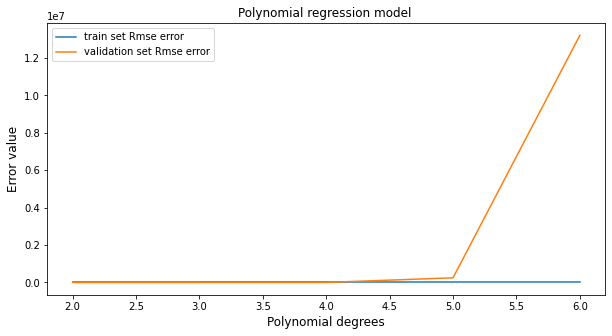



Minimum Rmse for Polynomial regression model (based on avergae train & validation) is : 0.5579135017543697
Polynomial degrees is : 2


In [ ]:
deg_list = [2,3,4,5,6]

plot_ploy_rmse(deg_list)

In [ ]:
pipeline_ploy = make_pipeline(
    PolynomialFeatures(degree=2),
    Ridge(10**-6)
)

rmse_error(pipeline_ploy, df_feature_standard, df_price, return_enable = False)

Average RMSE for training set in  Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=1e-06))])  is  0.1838142708742835
Average RMSE for validation set in  Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=1e-06))])  is  0.5579135017543697




In [ ]:
pipeline_ploy = make_pipeline(
    PolynomialFeatures(degree=6),
    Ridge(10**-6)
)

rmse_error(pipeline_ploy, df_feature_standard, df_price, return_enable = False)

Average RMSE for training set in  Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=6)),
                ('ridge', Ridge(alpha=1e-06))])  is  0.1632508888238505
Average RMSE for validation set in  Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=6)),
                ('ridge', Ridge(alpha=1e-06))])  is  13210746.113252386




In [ ]:
#finding best ploy degree
#using gridsearch

X_train, X_test, y_train, y_test = train_test_split(df_feature_standard, df_price, test_size=0.2)


penalty_parameter = [10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 100, 1000, 10000, 100000]

warnings.filterwarnings("ignore")

poly_params = {
    'polynomialfeatures__degree': [2,3,4,5,6],
    'ridge__alpha': penalty_parameter
}


poly_grid = GridSearchCV(pipeline_ploy, poly_params, cv=10, scoring='neg_root_mean_squared_error')

#poly_grid.fit(df_feature_standard, df_price)
poly_grid.fit(X_train, y_train)

print('Best Polynomial Regression RMSE:', -poly_grid.best_score_)
print('Best Polynomial Regression parameter:', poly_grid.best_params_)


mse_test = mean_squared_error(y_test, poly_grid.predict(X_test))

rmse_test = np.sqrt(mse_test)

print("Best Polynomial Regression RMSE on test set:", rmse_test)


Best Polynomial Regression RMSE: 0.25138486401960003
Best Polynomial Regression parameter: {'polynomialfeatures__degree': 2, 'ridge__alpha': 1e-06}
Best Polynomial Regression RMSE on test set: 1.2981611521874812


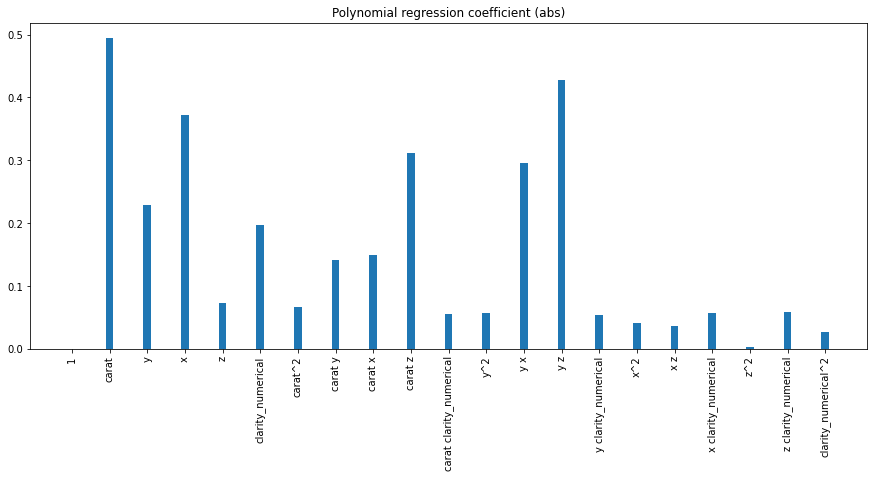



The most salient feature is :  carat


In [ ]:
pipeline_ploy = make_pipeline(
    PolynomialFeatures(degree=2),
    Ridge(alpha=10**-6)
)

#X_train, X_test, y_train, y_test = train_test_split(df_feature_standard, df_price, test_size=0.2)

#pipeline_ploy.fit(X_train, y_train)

pipeline_ploy.fit(df_feature_standard, df_price)

ridge_coef = abs(pipeline_ploy.named_steps['ridge'].coef_)


most_salient_index = np.argsort(ridge_coef)[::-1][0]


####plot
poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(df_feature)

ploy_feature_list = poly.get_feature_names_out()

fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(ploy_feature_list, ridge_coef, width=0.2)

plt.title("Polynomial regression coefficient (abs)")
plt.xticks(rotation=90)
plt.show()
####

df_poly = pd.DataFrame(X_poly, columns = poly.get_feature_names_out())


most_salient = df_poly.columns[most_salient_index]

print('\n')
print('The most salient feature is : ',most_salient)

# 3.3.3 Neural Network

In [ ]:
penalty_parameter = [10**-3, 10**-2, 10**-1, 1]

X_train, X_test, y_train, y_test = train_test_split(df_standard, np.log(df_price), test_size=0.2)

ml_param = {    
    'hidden_layer_sizes': [(10,), (20,), (10,10), (20,20), (40, 40)],
    'alpha': penalty_parameter,
}


mlp = MLPRegressor(max_iter=1000)

# Create the grid search object
nn_grid = GridSearchCV(mlp, ml_param, cv=10, scoring='neg_root_mean_squared_error')

# Fit the grid search object to the data
nn_grid.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=MLPRegressor(max_iter=1000),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1],
                         'hidden_layer_sizes': [(10,), (20,), (10, 10),
                                                (20, 20), (40, 40)]},
             scoring='neg_root_mean_squared_error')

In [ ]:
print('Best Netural Network RMSE:', -nn_grid.best_score_)
print('Best Netural Network parameter:', nn_grid.best_params_)

mse_test_nn = mean_squared_error(y_test, nn_grid.predict(X_test))

rmse_test_nn = np.sqrt(mse_test_nn)

print("Best Netural Network RMSE on test set:", rmse_test_nn)

Best Netural Network RMSE: 0.01836456510461911
Best Netural Network parameter: {'alpha': 0.1, 'hidden_layer_sizes': (40, 40)}
Best Netural Network RMSE on test set: 0.017987914883904804


In [ ]:
# evaluate the RMSE of the MLP Regressor

mlp_optimal = MLPRegressor(hidden_layer_sizes=(40, 40), alpha=0.1, max_iter=1000)

rmse_error(mlp_optimal, df_standard, np.log(df_price))


Average RMSE for training set in  MLPRegressor(alpha=0.1, hidden_layer_sizes=(40, 40), max_iter=1000)  is  0.018444538340674423
Average RMSE for validation set in  MLPRegressor(alpha=0.1, hidden_layer_sizes=(40, 40), max_iter=1000)  is  0.019085187118884614




(0.018444538340674423, 0.019085187118884614)

# 3.3.4 Random Forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_standard, np.log(df_price), test_size=0.2)

# pickle file exist under pickle_files directory
random_forest_params = {
    'max_features': np.arange(0.1,1.1,0.1)
}

random_forest_regressor = RandomForestRegressor()

random_forest_max_features_grid = GridSearchCV(random_forest_regressor, random_forest_params, cv=10, scoring="neg_root_mean_squared_error", return_train_score=True)

random_forest_max_features_grid.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_features': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [ ]:
# pickle file exist under pickle_files directory
random_forest_params = {
    'n_estimators': np.arange(10, 210, 10)
}

random_forest_regressor = RandomForestRegressor()

random_forest_n_estimators_grid = GridSearchCV(random_forest_regressor, random_forest_params, cv=10, scoring="neg_root_mean_squared_error", return_train_score=True)

random_forest_n_estimators_grid.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [ ]:
# pickle file exist under pickle_files directory
random_forest_params = {
    'max_depth': np.arange(1, 20)
}

random_forest_regressor = RandomForestRegressor()

random_forest_max_depth_grid = GridSearchCV(random_forest_regressor, random_forest_params, cv=10, scoring="neg_root_mean_squared_error", return_train_score=True)

random_forest_max_depth_grid.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [ ]:
rf_max_features_df = pd.DataFrame(random_forest_max_features_grid.cv_results_)[['mean_test_score', 'mean_train_score', 'param_max_features']]
rf_n_estimators_df = pd.DataFrame(random_forest_n_estimators_grid.cv_results_)[['mean_test_score', 'mean_train_score', 'param_n_estimators']]
rf_max_depth_df = pd.DataFrame(random_forest_max_depth_grid.cv_results_)[['mean_test_score', 'mean_train_score', 'param_max_depth']]


<Axes: title={'center': 'The Impact of Depth of Each Tree on Random Forest Performance'}, xlabel='Depth of Each Tree', ylabel='Mean Train Score'>

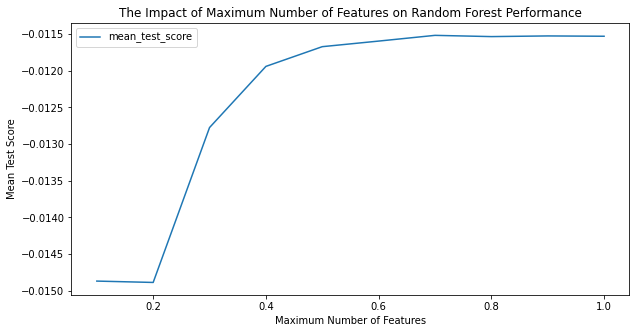

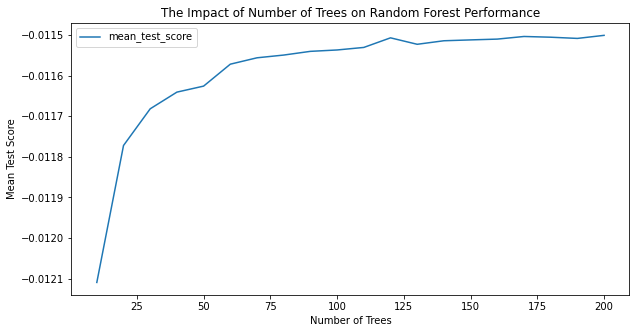

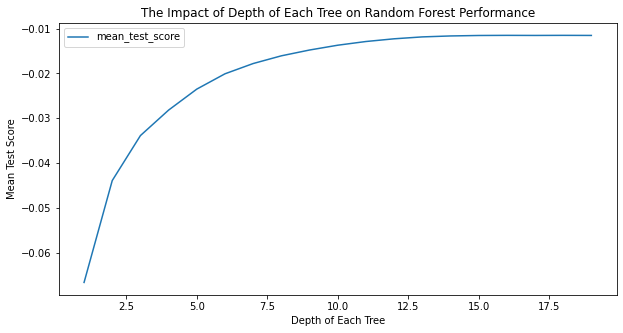

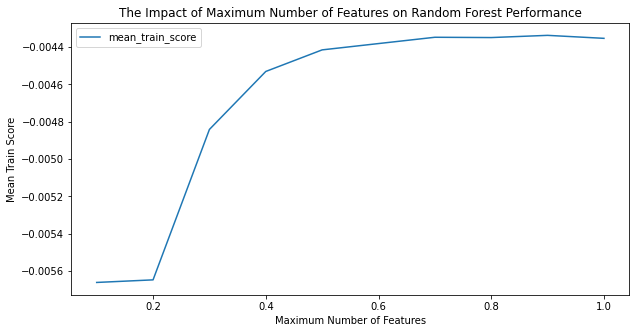

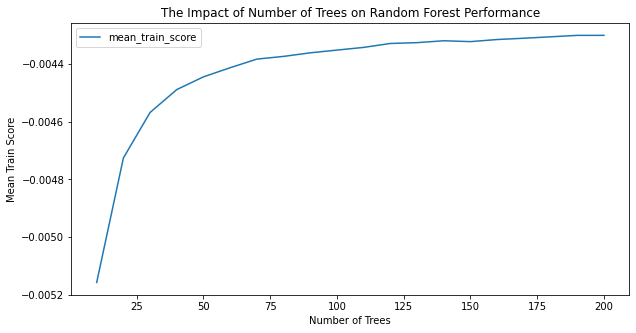

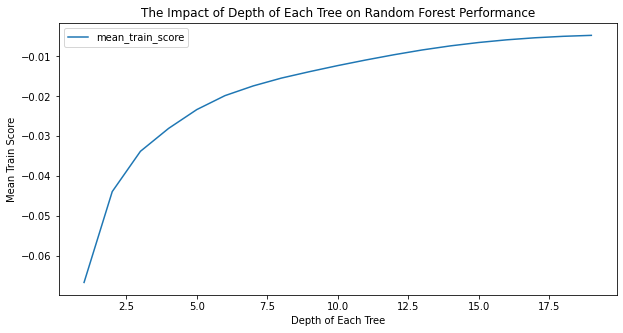

In [ ]:
rf_max_features_df = pickle.load(open("/content/drive/MyDrive/ECE 219/Project 4/pickle_files/rf_max_features_df.pkl", "rb"))
rf_n_estimators_df = pickle.load(open("/content/drive/MyDrive/ECE 219/Project 4/pickle_files/rf_n_estimators_df.pkl", "rb"))
rf_max_depth_df = pickle.load(open("/content/drive/MyDrive/ECE 219/Project 4/pickle_files/rf_max_depth_df.pkl", "rb"))

rf_max_features_df.plot(x='param_max_features',
                        xlabel='Maximum Number of Features',
                        y='mean_test_score',
                        ylabel='Mean Test Score',
                        title="The Impact of Maximum Number of Features on Random Forest Performance")

rf_n_estimators_df.plot(x='param_n_estimators',
                        xlabel='Number of Trees',
                        y='mean_test_score',
                        ylabel='Mean Test Score',
                        title="The Impact of Number of Trees on Random Forest Performance")

rf_max_depth_df.plot(x='param_max_depth',
                     xlabel='Depth of Each Tree',
                     y='mean_test_score',
                     ylabel='Mean Test Score',
                     title="The Impact of Depth of Each Tree on Random Forest Performance")

rf_max_features_df.plot(x='param_max_features',
                        xlabel='Maximum Number of Features',
                        y='mean_train_score',
                        ylabel='Mean Train Score',
                        title="The Impact of Maximum Number of Features on Random Forest Performance")

rf_n_estimators_df.plot(x='param_n_estimators',
                        xlabel='Number of Trees',
                        y='mean_train_score',
                        ylabel='Mean Train Score',
                        title="The Impact of Number of Trees on Random Forest Performance")

rf_max_depth_df.plot(x='param_max_depth',
                     xlabel='Depth of Each Tree',
                     y='mean_train_score',
                     ylabel='Mean Train Score',
                     title="The Impact of Depth of Each Tree on Random Forest Performance")

In [ ]:
from sklearn.tree import export_graphviz

random_forest_regressor = RandomForestRegressor(max_features=0.6, n_estimators=75, max_depth=4, oob_score=True)
random_forest_regressor.fit(X_train, y_train)
estimator = random_forest_regressor.estimators_[int(np.random.rand(1)*75)]
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names=df_num.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

## Run `dot -Tpng tree.dot -o tree.png` in terminal under the same directory

## Then Run the following code segment to display the image may not work on colab

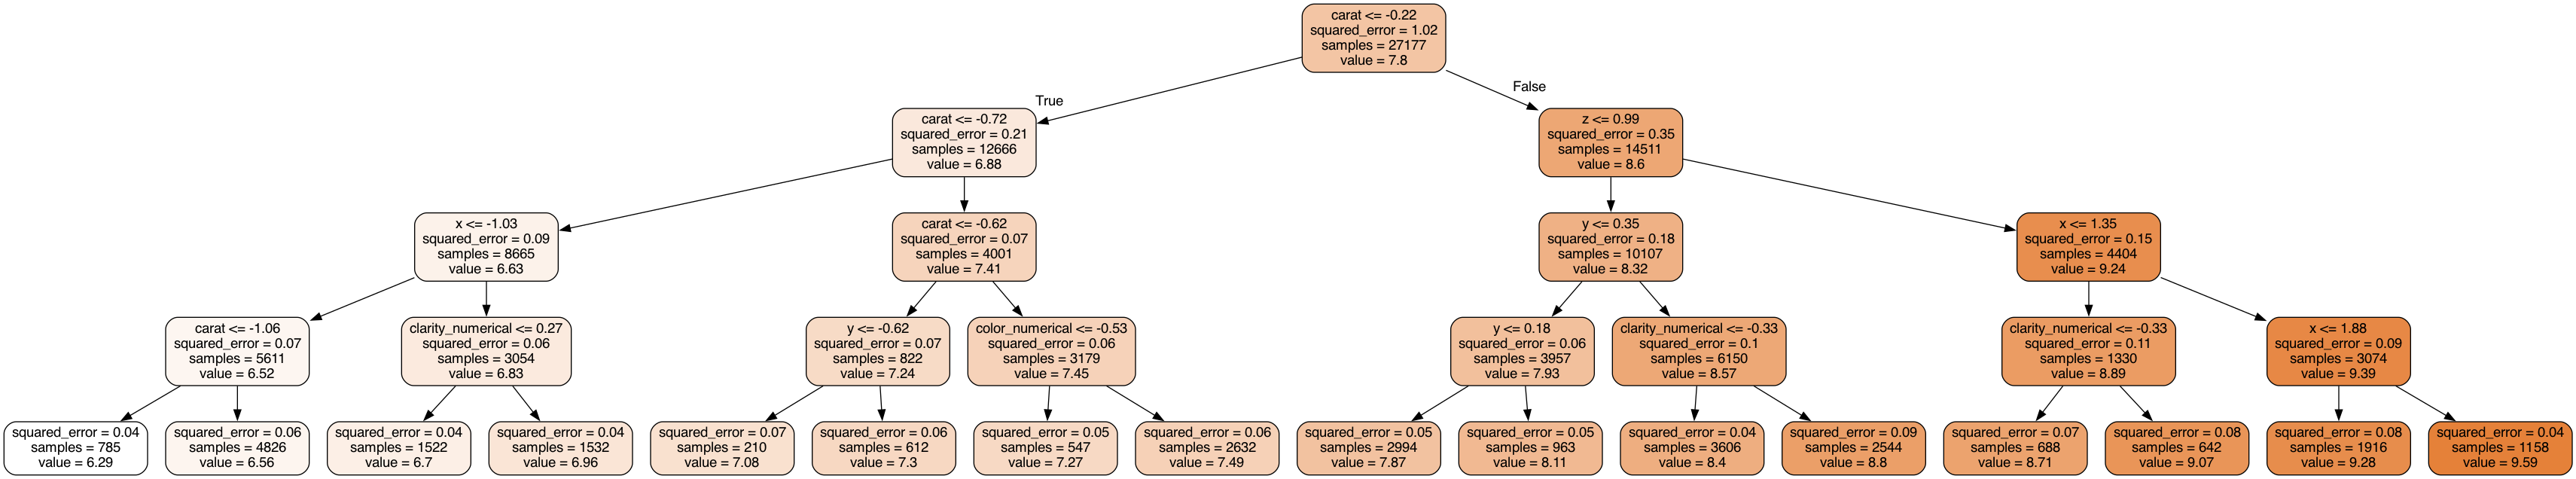

In [ ]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
random_forest_regressor = RandomForestRegressor(max_features=0.6, n_estimators=75, max_depth=10, oob_score=True)
random_forest_regressor.fit(X_train, y_train)
oob_error = 1 - random_forest_regressor.oob_score_
print("The OOB Score is", random_forest_regressor.oob_score_)
print("The OOB error is", oob_error)

R2_score = r2_score(y_test, random_forest_regressor.predict(X_test))

print("The R2 score is", R2_score)

The OOB Score is 0.9885909144319871
The OOB error is 0.0114090855680129
The R2 score is 0.9879786393202309


#3.3.5 LightGBM and Bayesian Optimization

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_standard, np.log(df_price), test_size=0.2)

lgb_model = lgb.LGBMRegressor(objective='regression',random_state=42)

In [ ]:
search_space = {'num_leaves': (10, 500),
     'learning_rate': (0.01, 1.0),
     'max_depth': [-1, 1, 10, 100],
     'min_child_samples' : (1, 50),
     "reg_alpha": [10**-3, 10**-2, 10**-1, 1, 10],
     'reg_lambda' : [10**-3, 10**-2, 10**-1, 1, 10]}

BayesianOpt = BayesSearchCV(lgb_model, search_space, n_iter=50, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)

BayesianOpt.fit(X_train, y_train)

BayesSearchCV(cv=5,
              estimator=LGBMRegressor(objective='regression', random_state=42),
              n_jobs=-1, random_state=42, scoring='neg_mean_squared_error',
              search_spaces={'learning_rate': (0.01, 1.0),
                             'max_depth': [-1, 1, 10, 100],
                             'min_child_samples': (1, 50),
                             'num_leaves': (10, 500),
                             'reg_alpha': [0.001, 0.01, 0.1, 1, 10],
                             'reg_lambda': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
best_params = BayesianOpt.best_params_
best_rmse = np.sqrt(-BayesianOpt.best_score_)

best_lgb_model = lgb.LGBMRegressor(**best_params, random_state=42)
best_lgb_model.fit(X_train, y_train)
y_pred = best_lgb_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Best hyperparameters: " + str(best_params))
print("Best RMSE in search: " + str(best_rmse))
print("Test RMSE: " + str(test_rmse))

Best hyperparameters: OrderedDict([('learning_rate', 0.12348186444818116), ('max_depth', 100), ('min_child_samples', 6), ('num_leaves', 496), ('reg_alpha', 0.1), ('reg_lambda', 10.0)])
Best RMSE in search: 0.011098344767528908
Test RMSE: 0.010765578940085965
